# Neural Networks

In [15]:
import numpy as np
from matplotlib import pyplot
import pandas as pd
from pylab import plt

plt.rcParams['figure.figsize'] = (12,5)
plt.rcParams['figure.dpi'] = 300

# Some functions to plot our points and draw the lines
def plot_points(features, labels, point_size=25):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    pyplot.scatter([s[0][0] for s in spam],
                   [s[0][1] for s in spam],
                   s = point_size,
                   color = 'violet',
                   edgecolor = 'k',
                   marker = '^')
    pyplot.scatter([s[0][0] for s in ham],
                   [s[0][1] for s in ham],
                   s = point_size,
                   color = 'green',
                   edgecolor = 'k',
                   marker = 's')
    pyplot.xlabel('x_1')
    pyplot.ylabel('x_2')
    pyplot.legend(['label 1','label 0'])

def draw_line(a,b,c, color='black', linewidth=2.0, linestyle='solid', starting=0, ending=3):
    # Plotting the line ax + by + c = 0
    x = np.linspace(starting, ending, 1000)
    pyplot.plot(x, -c/b - a*x/b, linestyle=linestyle, color=color, linewidth=linewidth)

f = lambda x: int(x[1]>x[0])
def g(Z):
    return np.array([f(i) for i in Z])

def plot_model(X, y, model):
    X = np.array(X)
    y = np.array(y)
    plot_step = 0.2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = g(Z).reshape(xx.shape)
    pyplot.contour(xx, yy, Z, colors = 'k',linewidths = 1)
    plot_points(X, y)
    pyplot.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.2, levels=range(-1,2))
    pyplot.show()

In [16]:
alien_dataset = pd.DataFrame({
    'aack':[1,2,0,0,1,1,2,2],
    'beep':[0,0,1,2,1,2,1,2],
    'happy': [0,0,0,0,1,1,1,1]})

X = alien_dataset[['aack', 'beep']]
y = alien_dataset['happy']

In [17]:
def plot_function(f):
    plot_points(X, y, 100)

    def h(x,y):
        return f(x,y)>=0.5

    xx, yy = np.meshgrid(np.arange(-0.5,3,0.005), np.arange(-0.5,3,0.005))
    Z = np.array([h(i[0], i[1]) for i in np.c_[xx.ravel(), yy.ravel()]])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.25, levels=range(-1,2))
    plt.contour(xx, yy, Z,colors = 'k',linewidths = 3)
    plt.show()

In [18]:
def step(x):
    if x >= 0:
        return 1
    else:
        return 0

def line_1(a,b):
    return step(6*a + 10*b - 15)

def line_2(a,b):
    return step(10*a + 6*b - 15)

def bias(a,b):
    return 1

def nn_with_step(a,b):
    return step(step(6*a + 10*b - 15) + step(10*a + 6*b - 15) - 1.5)

def sigmoid(x):
    return np.exp(x)/(1.0 + np.exp(x))

def nn_with_sigmoid(a,b):
    return sigmoid(1.0*sigmoid(6*a + 10*b - 15) + 1.0*sigmoid(10*a + 6*b - 15) - 1.5)

![](img/activation_curve.png)

![](img/curves.png)

## Boundaries of the first layer (linear classifiers and bias)

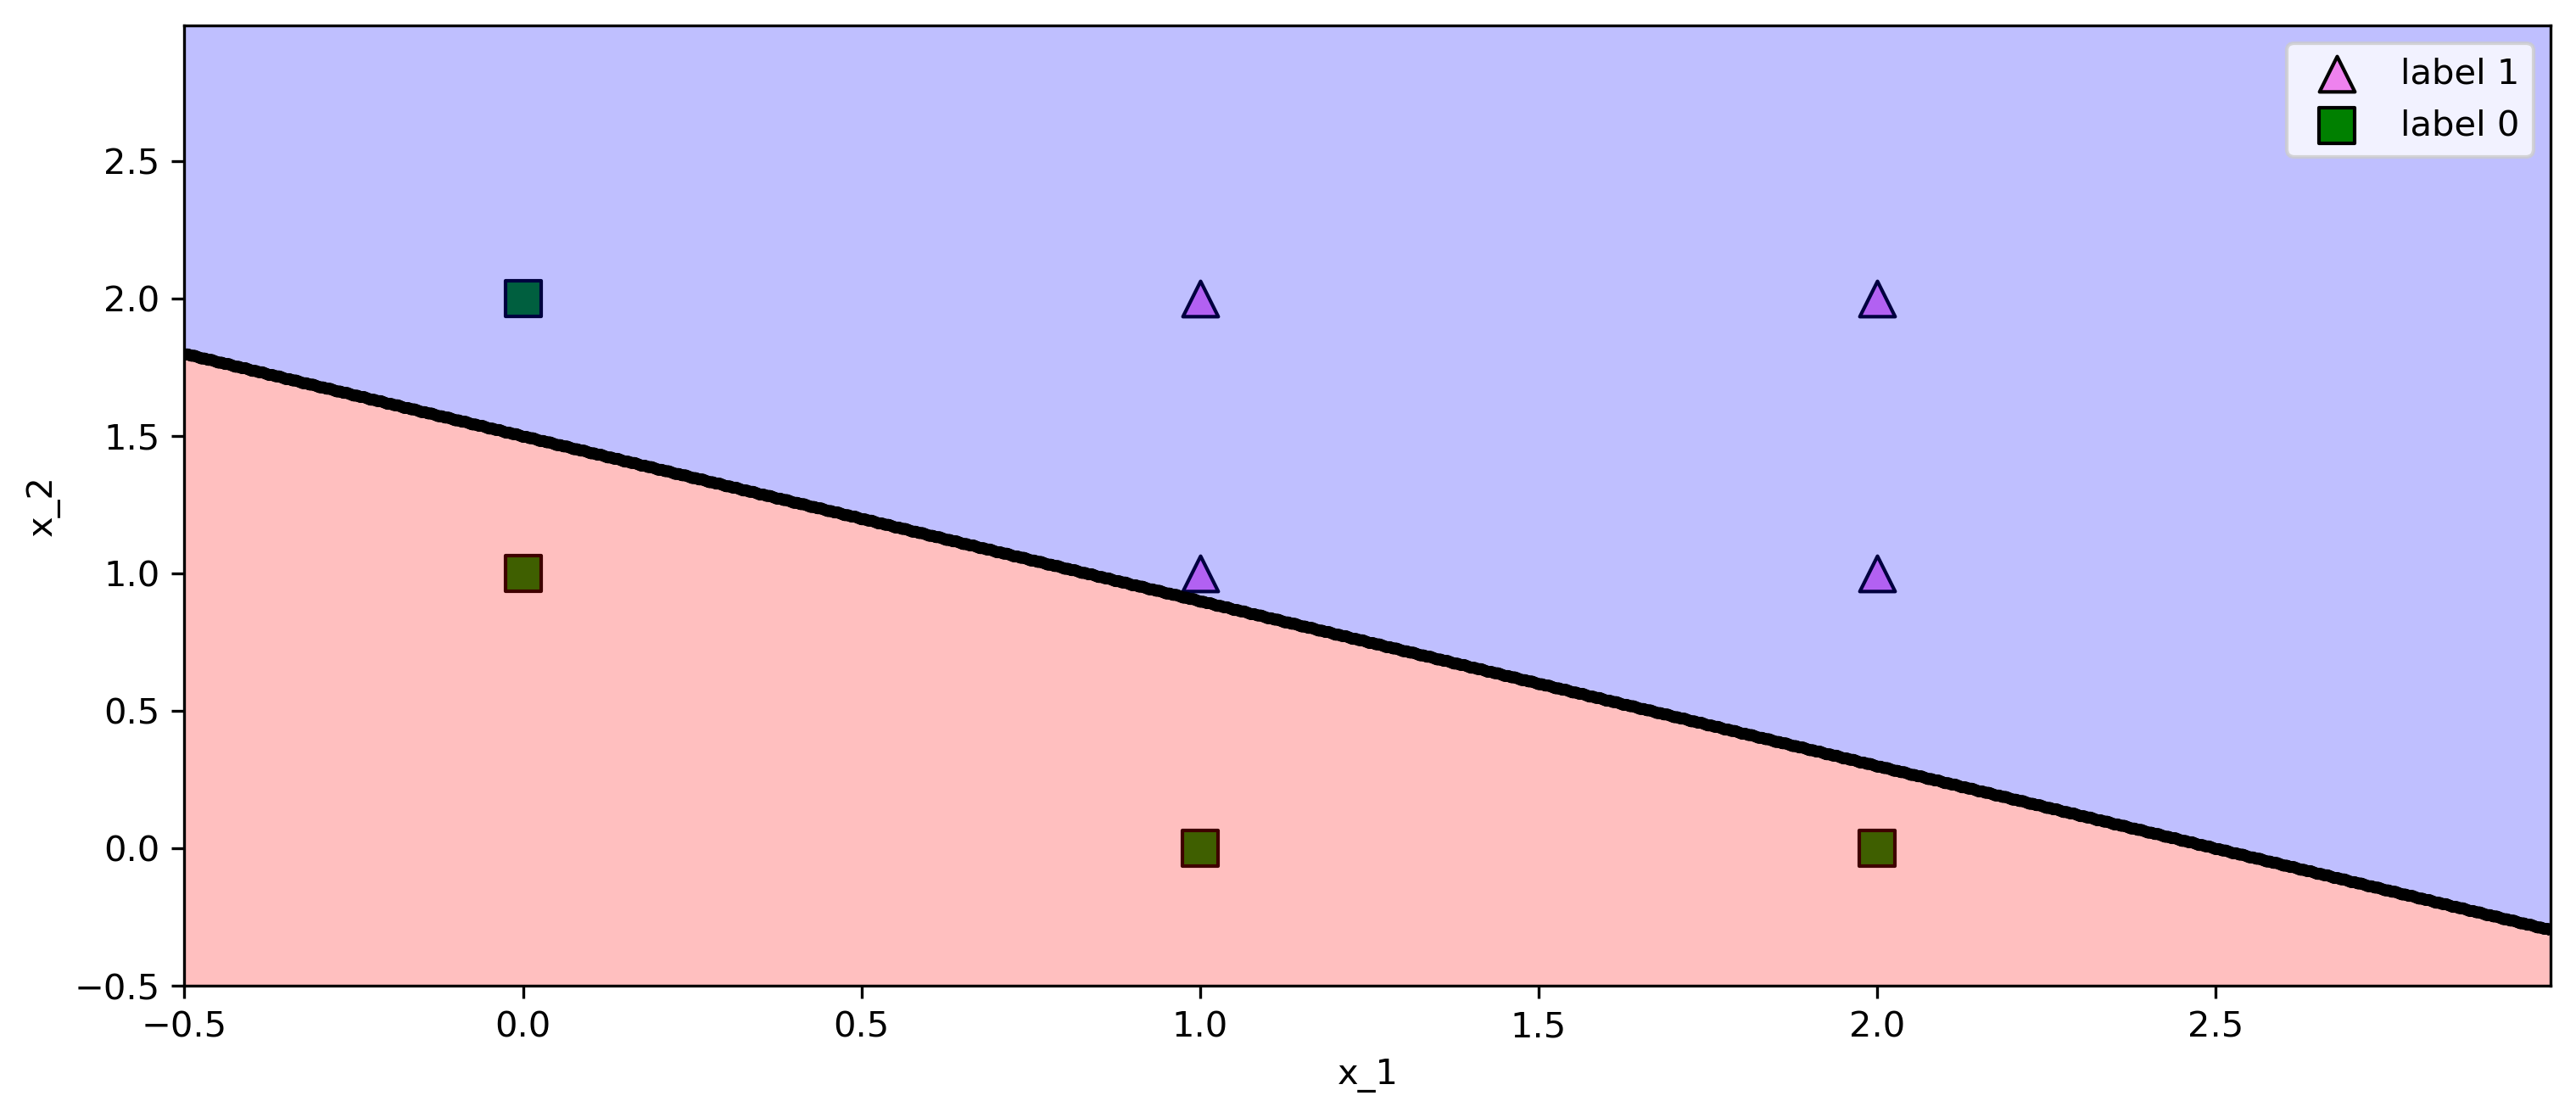

In [19]:
plot_function(line_1)

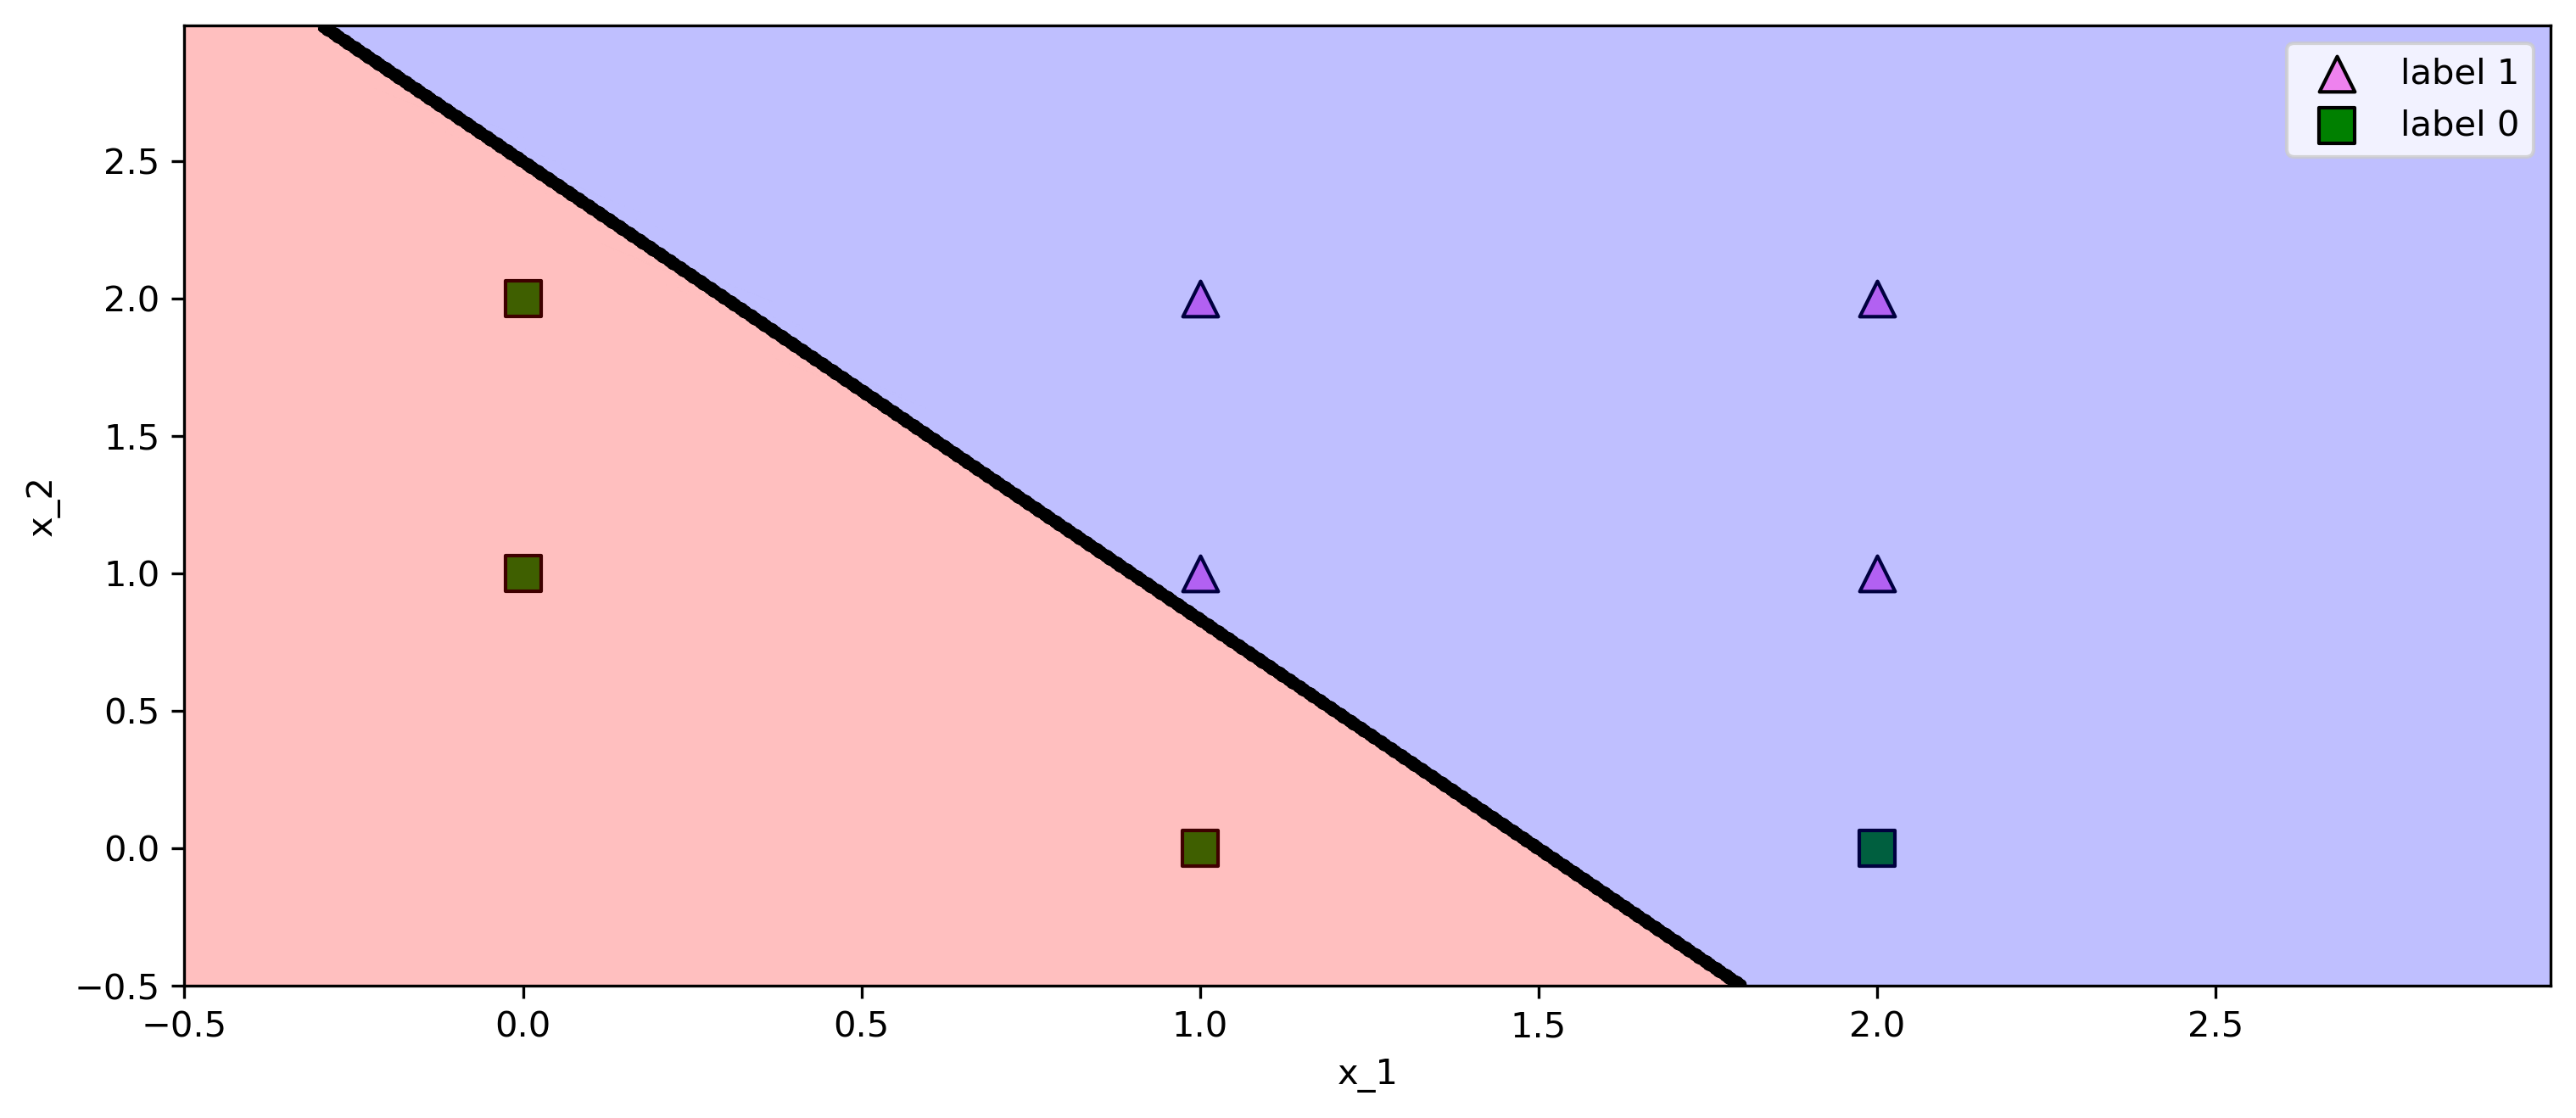

In [20]:
plot_function(line_2)

/var/folders/nj/dxc7zlcj7yvdjlh2gx96lkmr0000gn/T/ipykernel_12147/11259607.py:11: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z,colors = 'k',linewidths = 3)


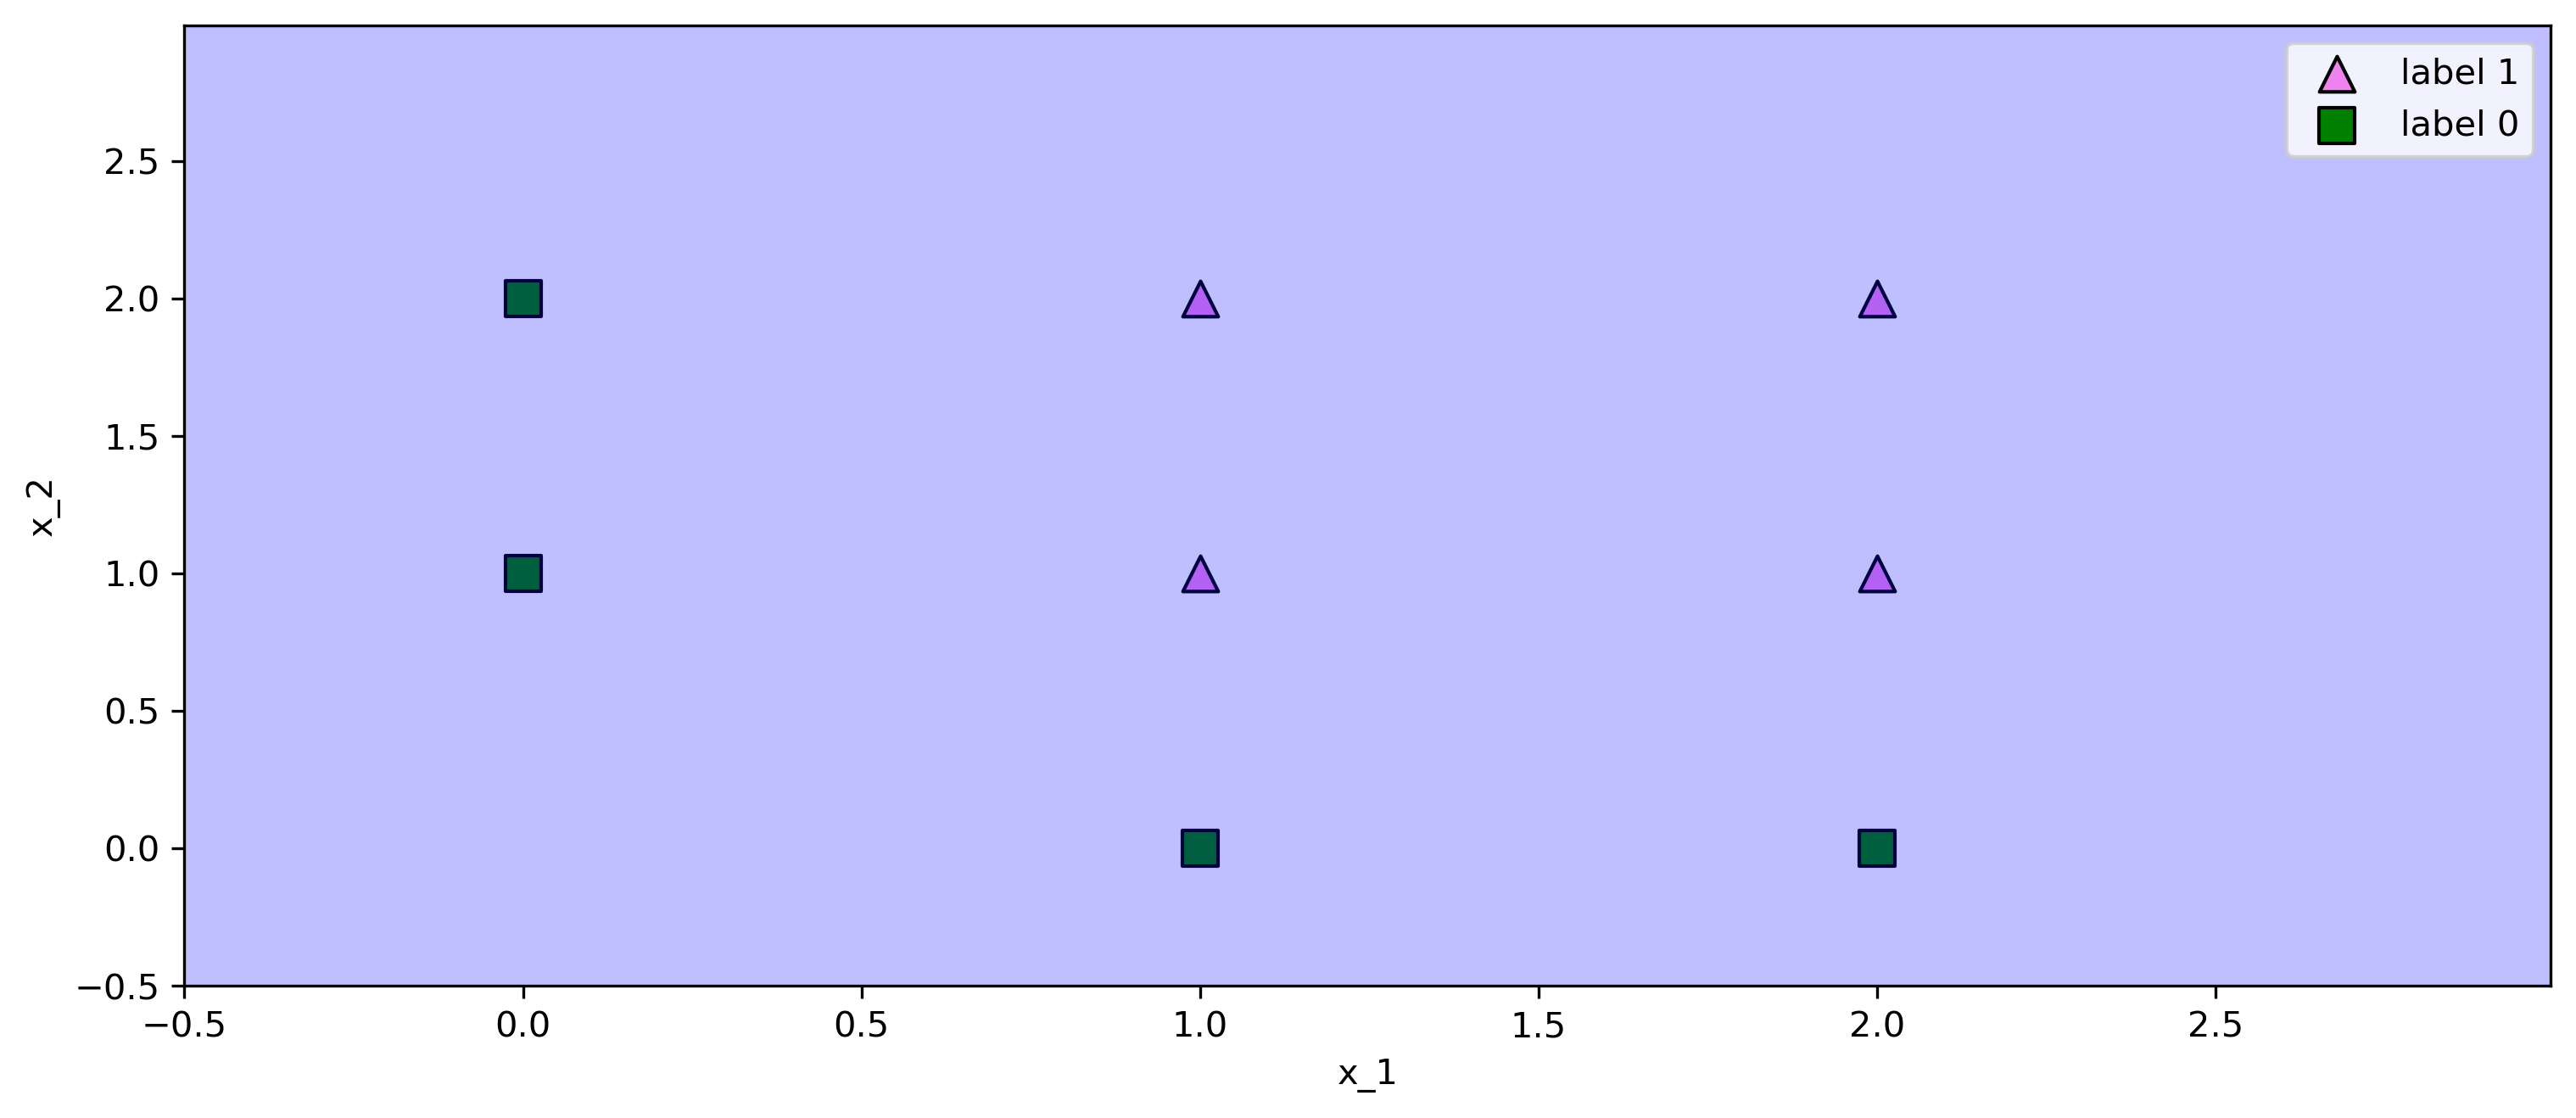

In [21]:
plot_function(bias)

## Boundaries of the second layer (non-linear classifiers)

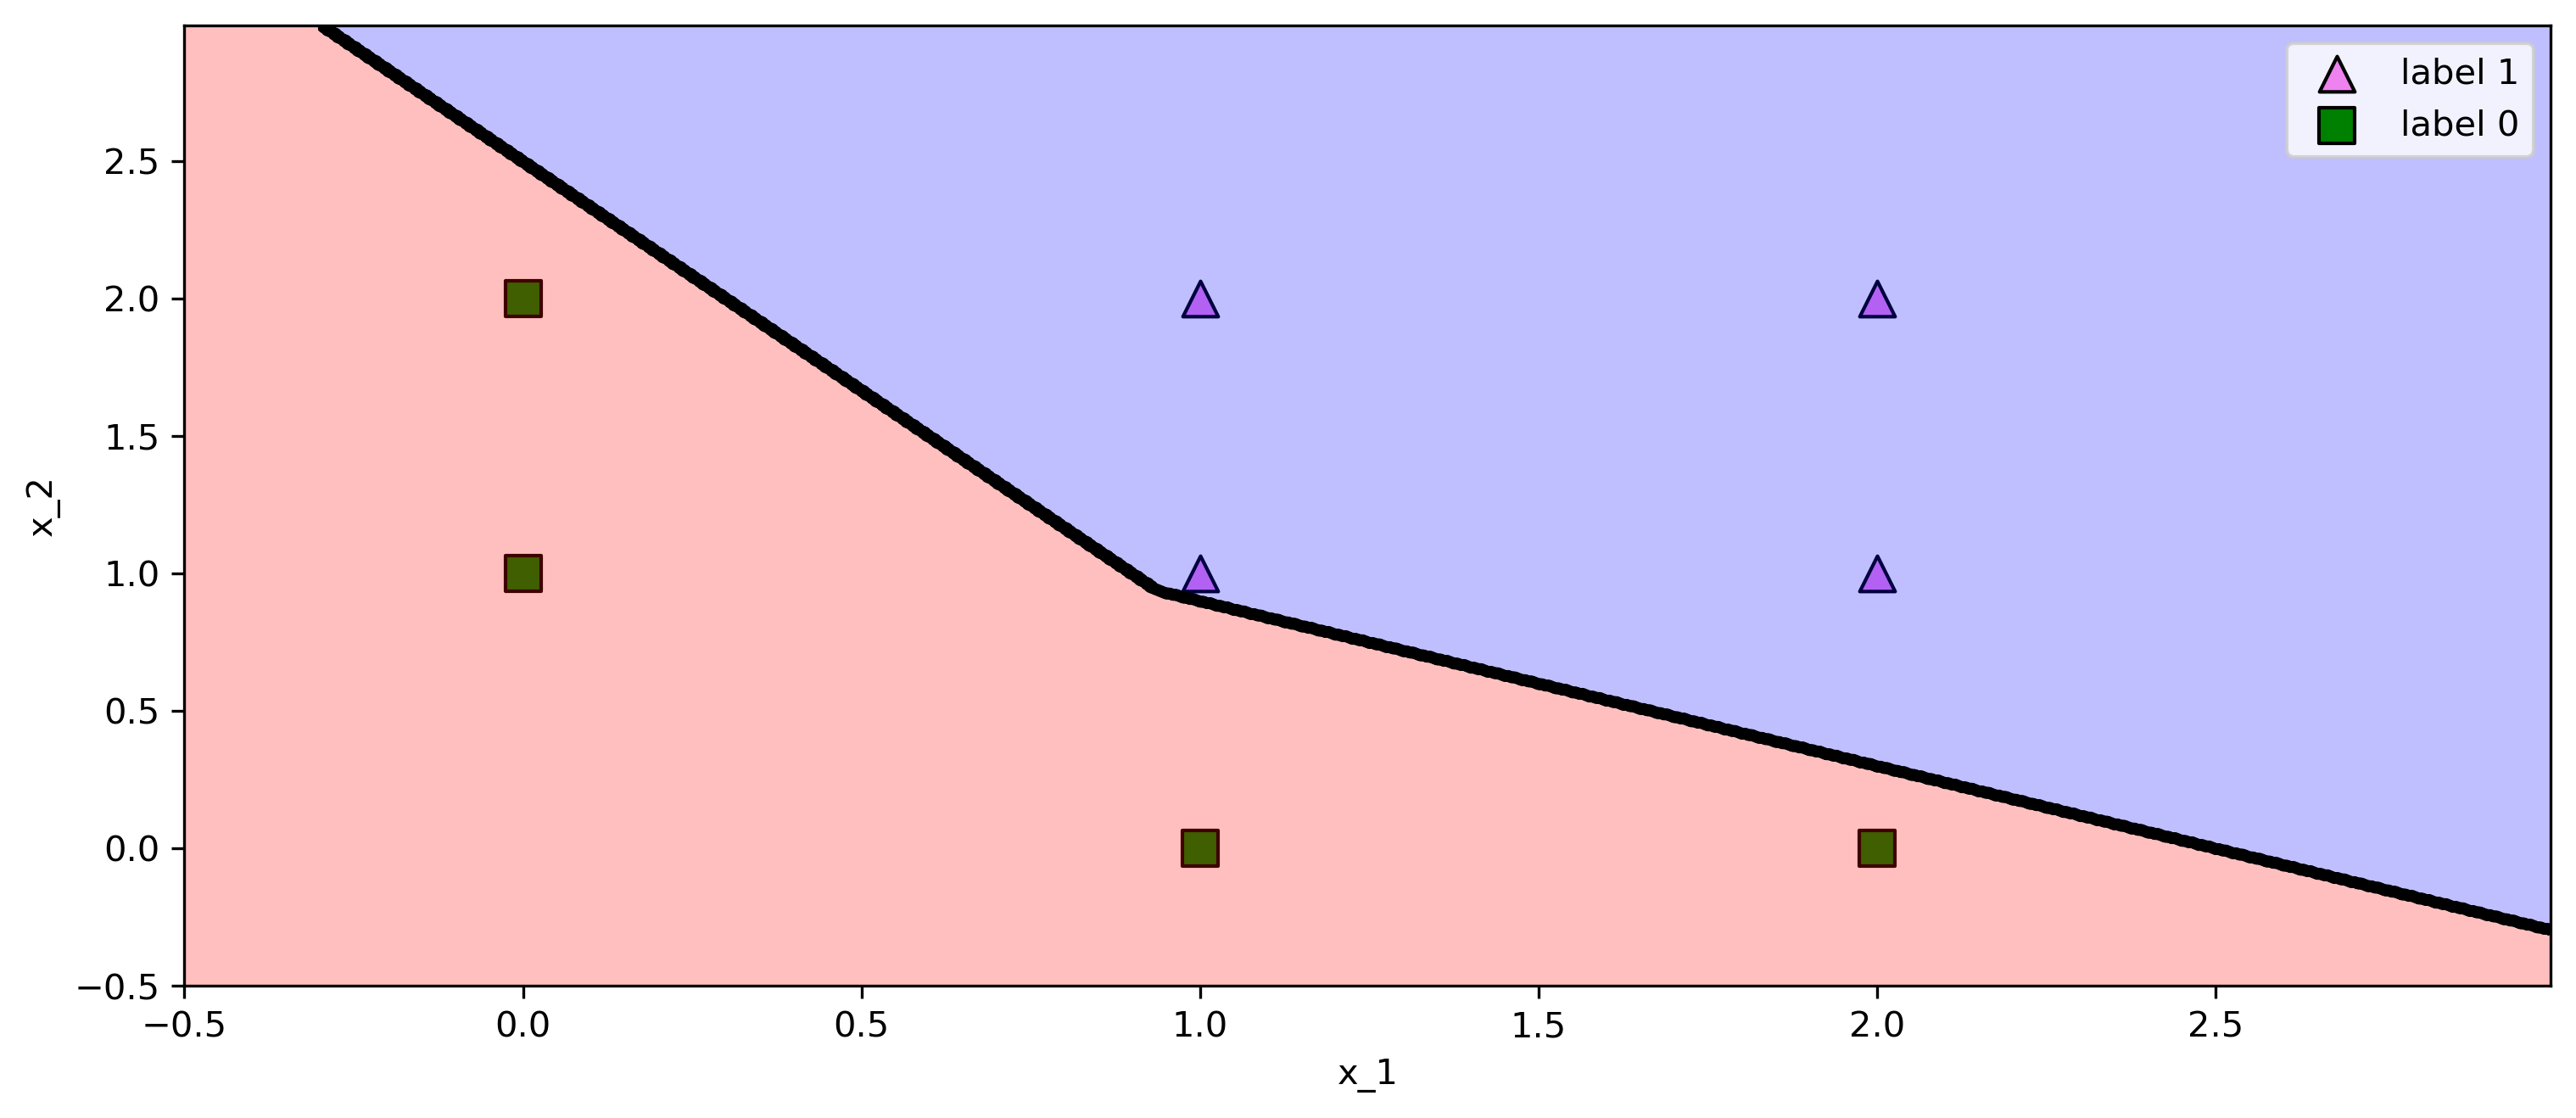

In [22]:
plot_function(nn_with_step)

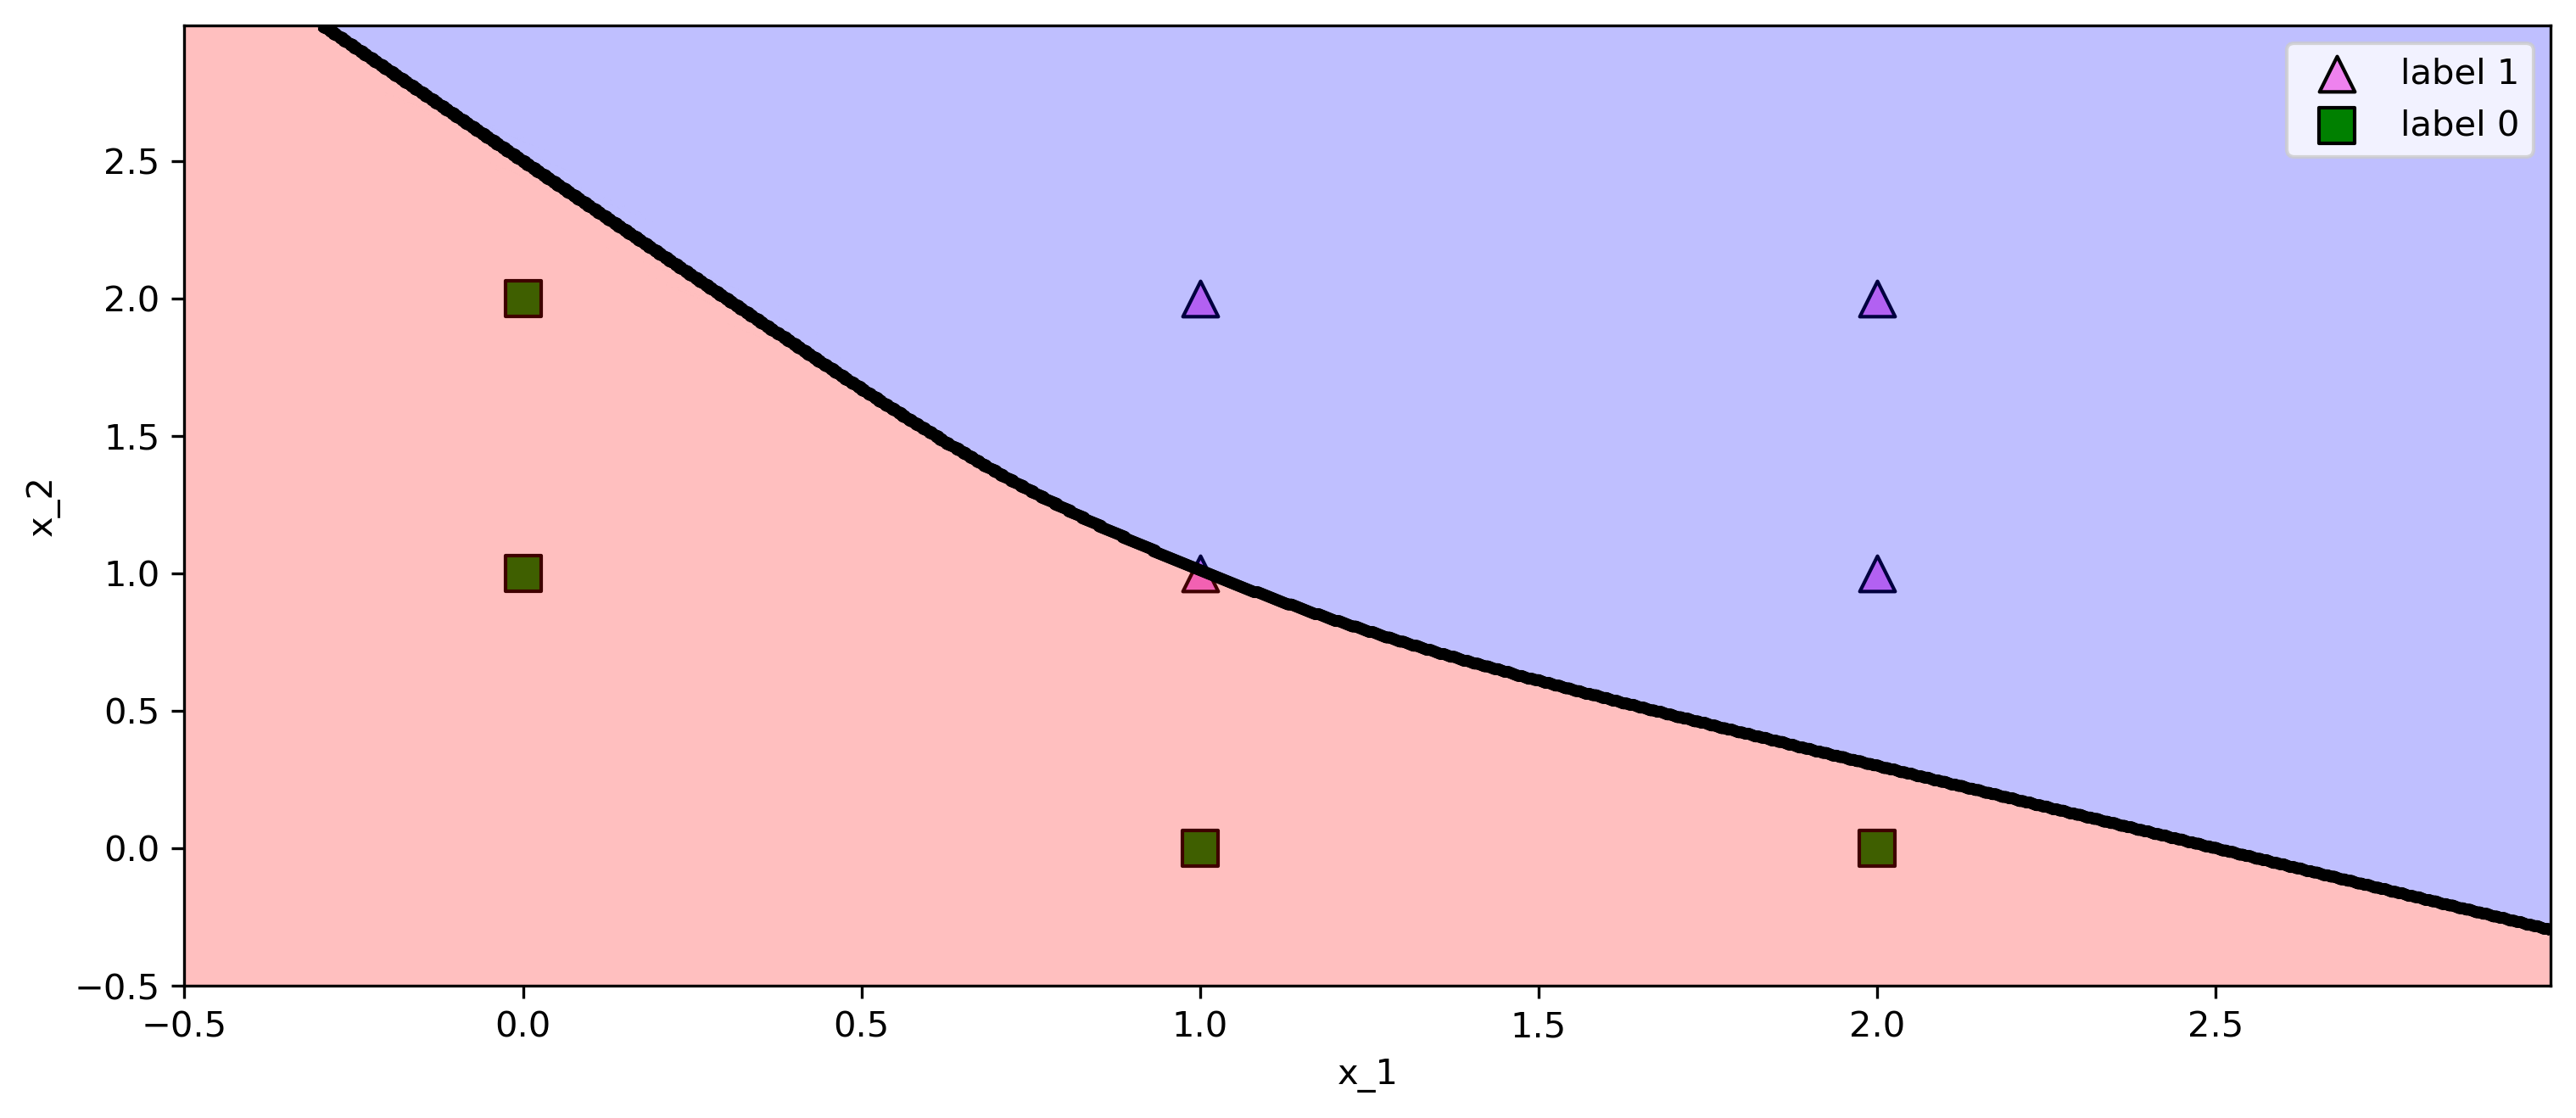

In [23]:
plot_function(nn_with_sigmoid)

-------
# Graphical Example

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# Setting random seeds to get reproducible results
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(1)


2023-01-15 15:35:48.564196: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
# Loading the one_circle dataset

df = pd.read_csv('datasets/one_circle.csv', index_col=0)
x = np.array(df[['x_1', 'x_2']])
y = np.array(df['y']).astype(int)

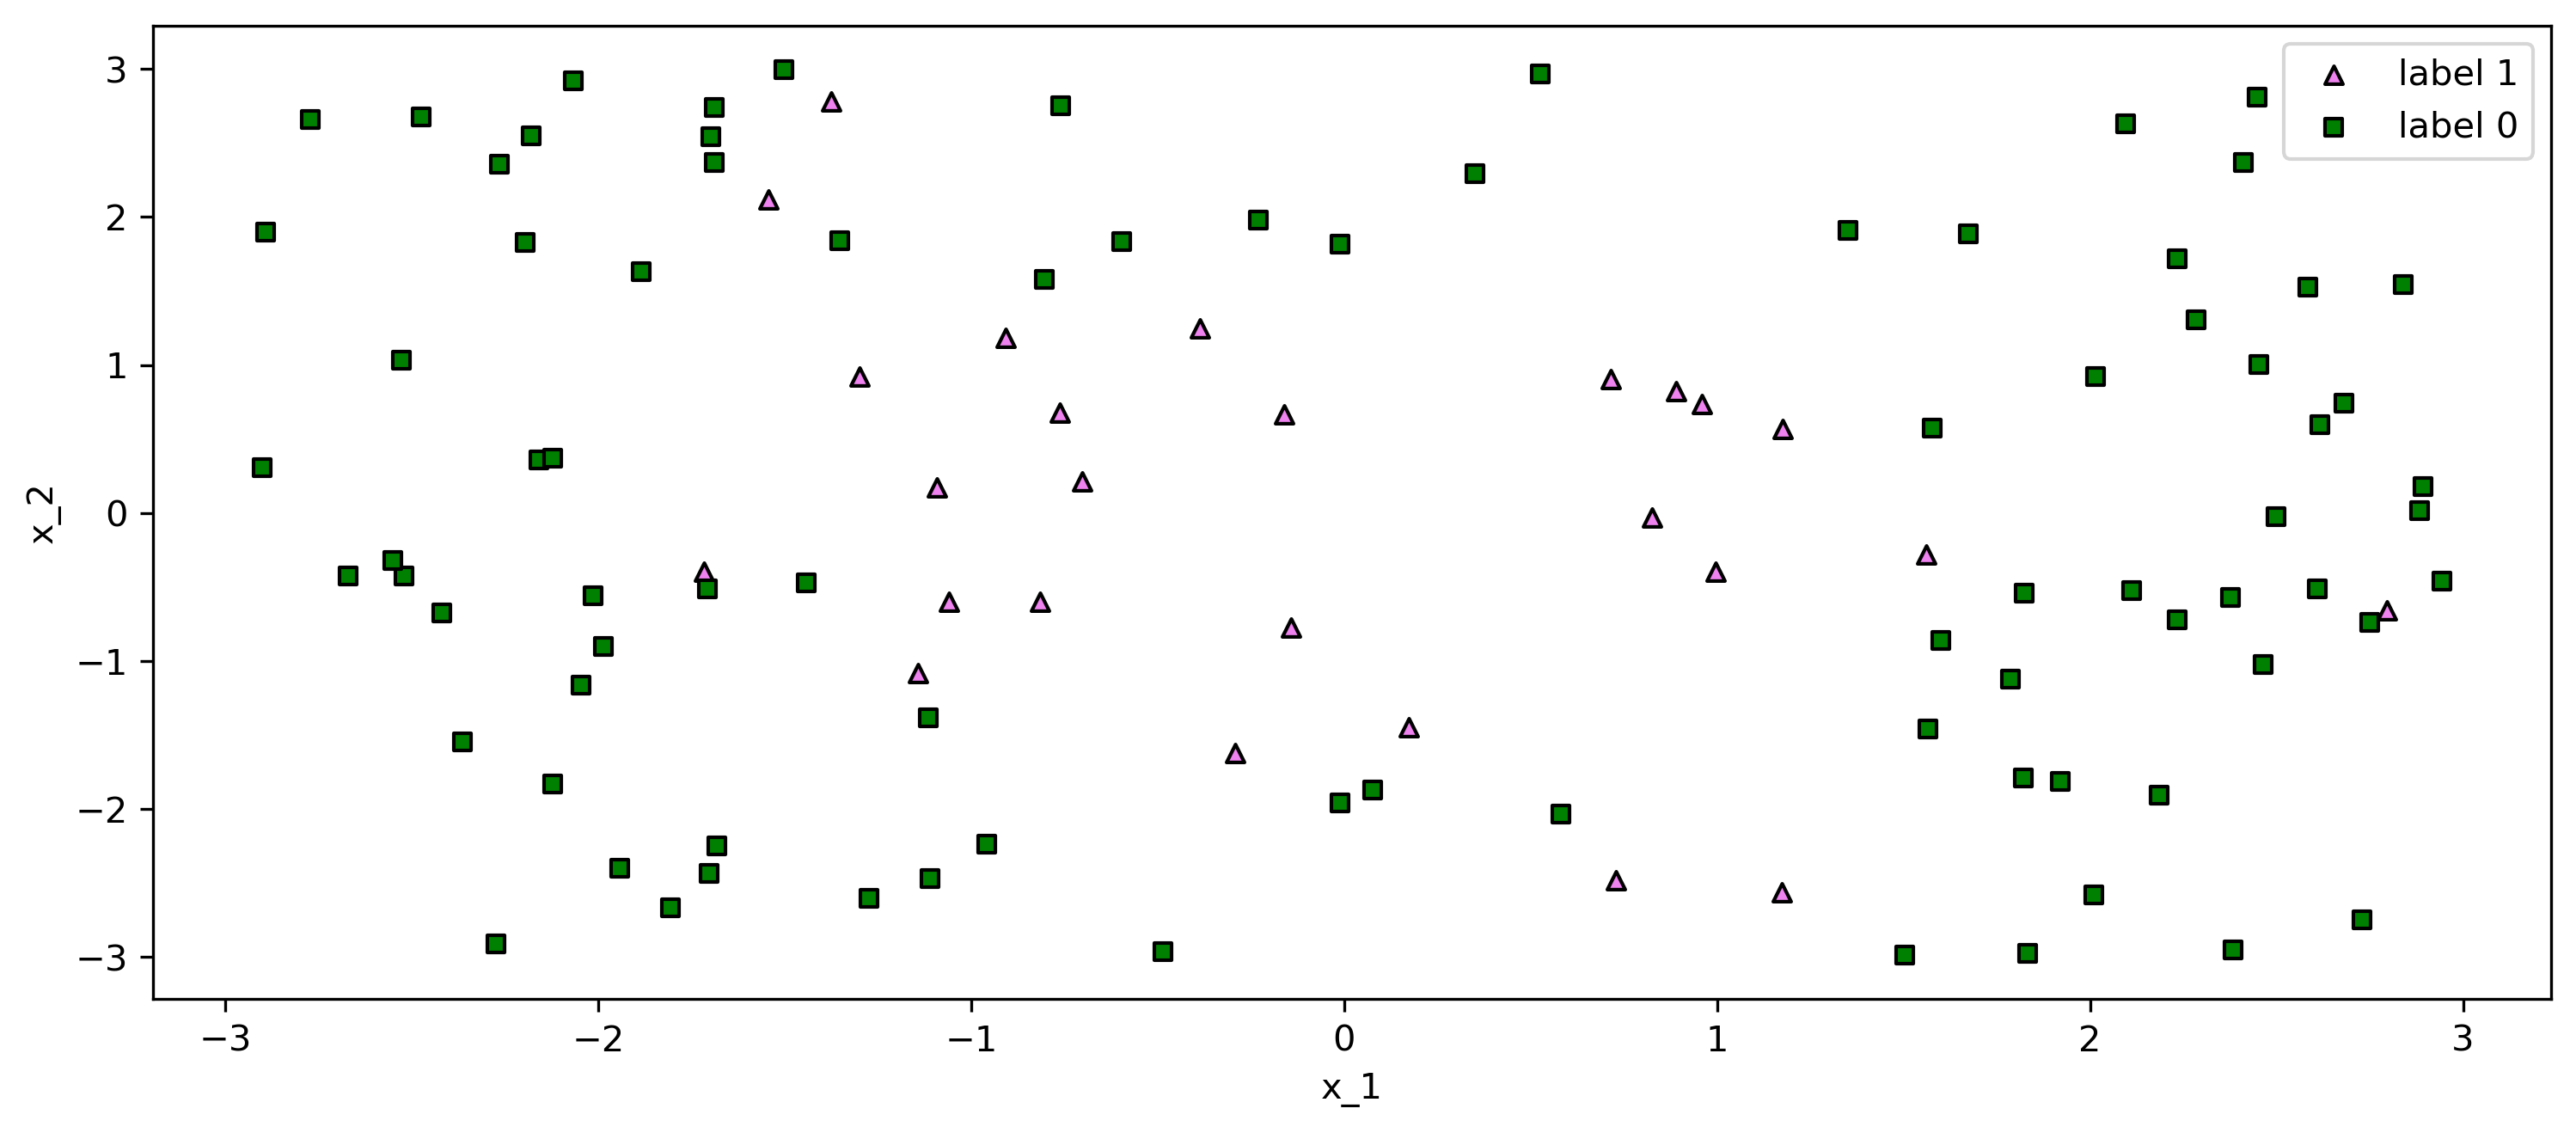

In [26]:
plot_points(x,y)

In [27]:
df[:10]

,x_1,x_2,y
0,-0.759416,2.753240,0
1,-1.885278,1.629527,0
2,2.463302,-1.023869,0
3,-1.986004,-0.898810,0
4,2.010834,-2.580117,0
5,2.410188,2.370501,0
6,1.599140,-0.862732,0
7,-1.109856,-2.469697,0
8,2.447342,2.811180,0
9,-1.697732,2.539848,0


In [29]:
y[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0])

In [30]:
# Categorizing the output
# simple one hot encoding for the purpose

from tensorflow.keras.utils import to_categorical
categorized_y = np.array(to_categorical(y, 2))
categorized_y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD

# Building the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(2,)))
model.add(Dropout(.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(2, activation='softmax'))

# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 8,770
Trainable params: 8,770
Non-trainable params: 0
_________________________________________________________________


2023-01-15 15:36:50.460807: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [32]:
model.fit(x, categorized_y, epochs=100, batch_size=10)

Epoch 1/100
11/11 [==============================] - 1s 2ms/step - loss: 0.5390 - accuracy: 0.7182
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4740 - accuracy: 0.7636
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4441 - accuracy: 0.7636
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4475 - accuracy: 0.7636
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4310 - accuracy: 0.7636
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4313 - accuracy: 0.7636
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.7636
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4376 - accuracy: 0.7636
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4380 - accuracy: 0.7636
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4188 - accuracy: 0.7636
Epoch 11/

50/50 [==============================] - 0s 1ms/step


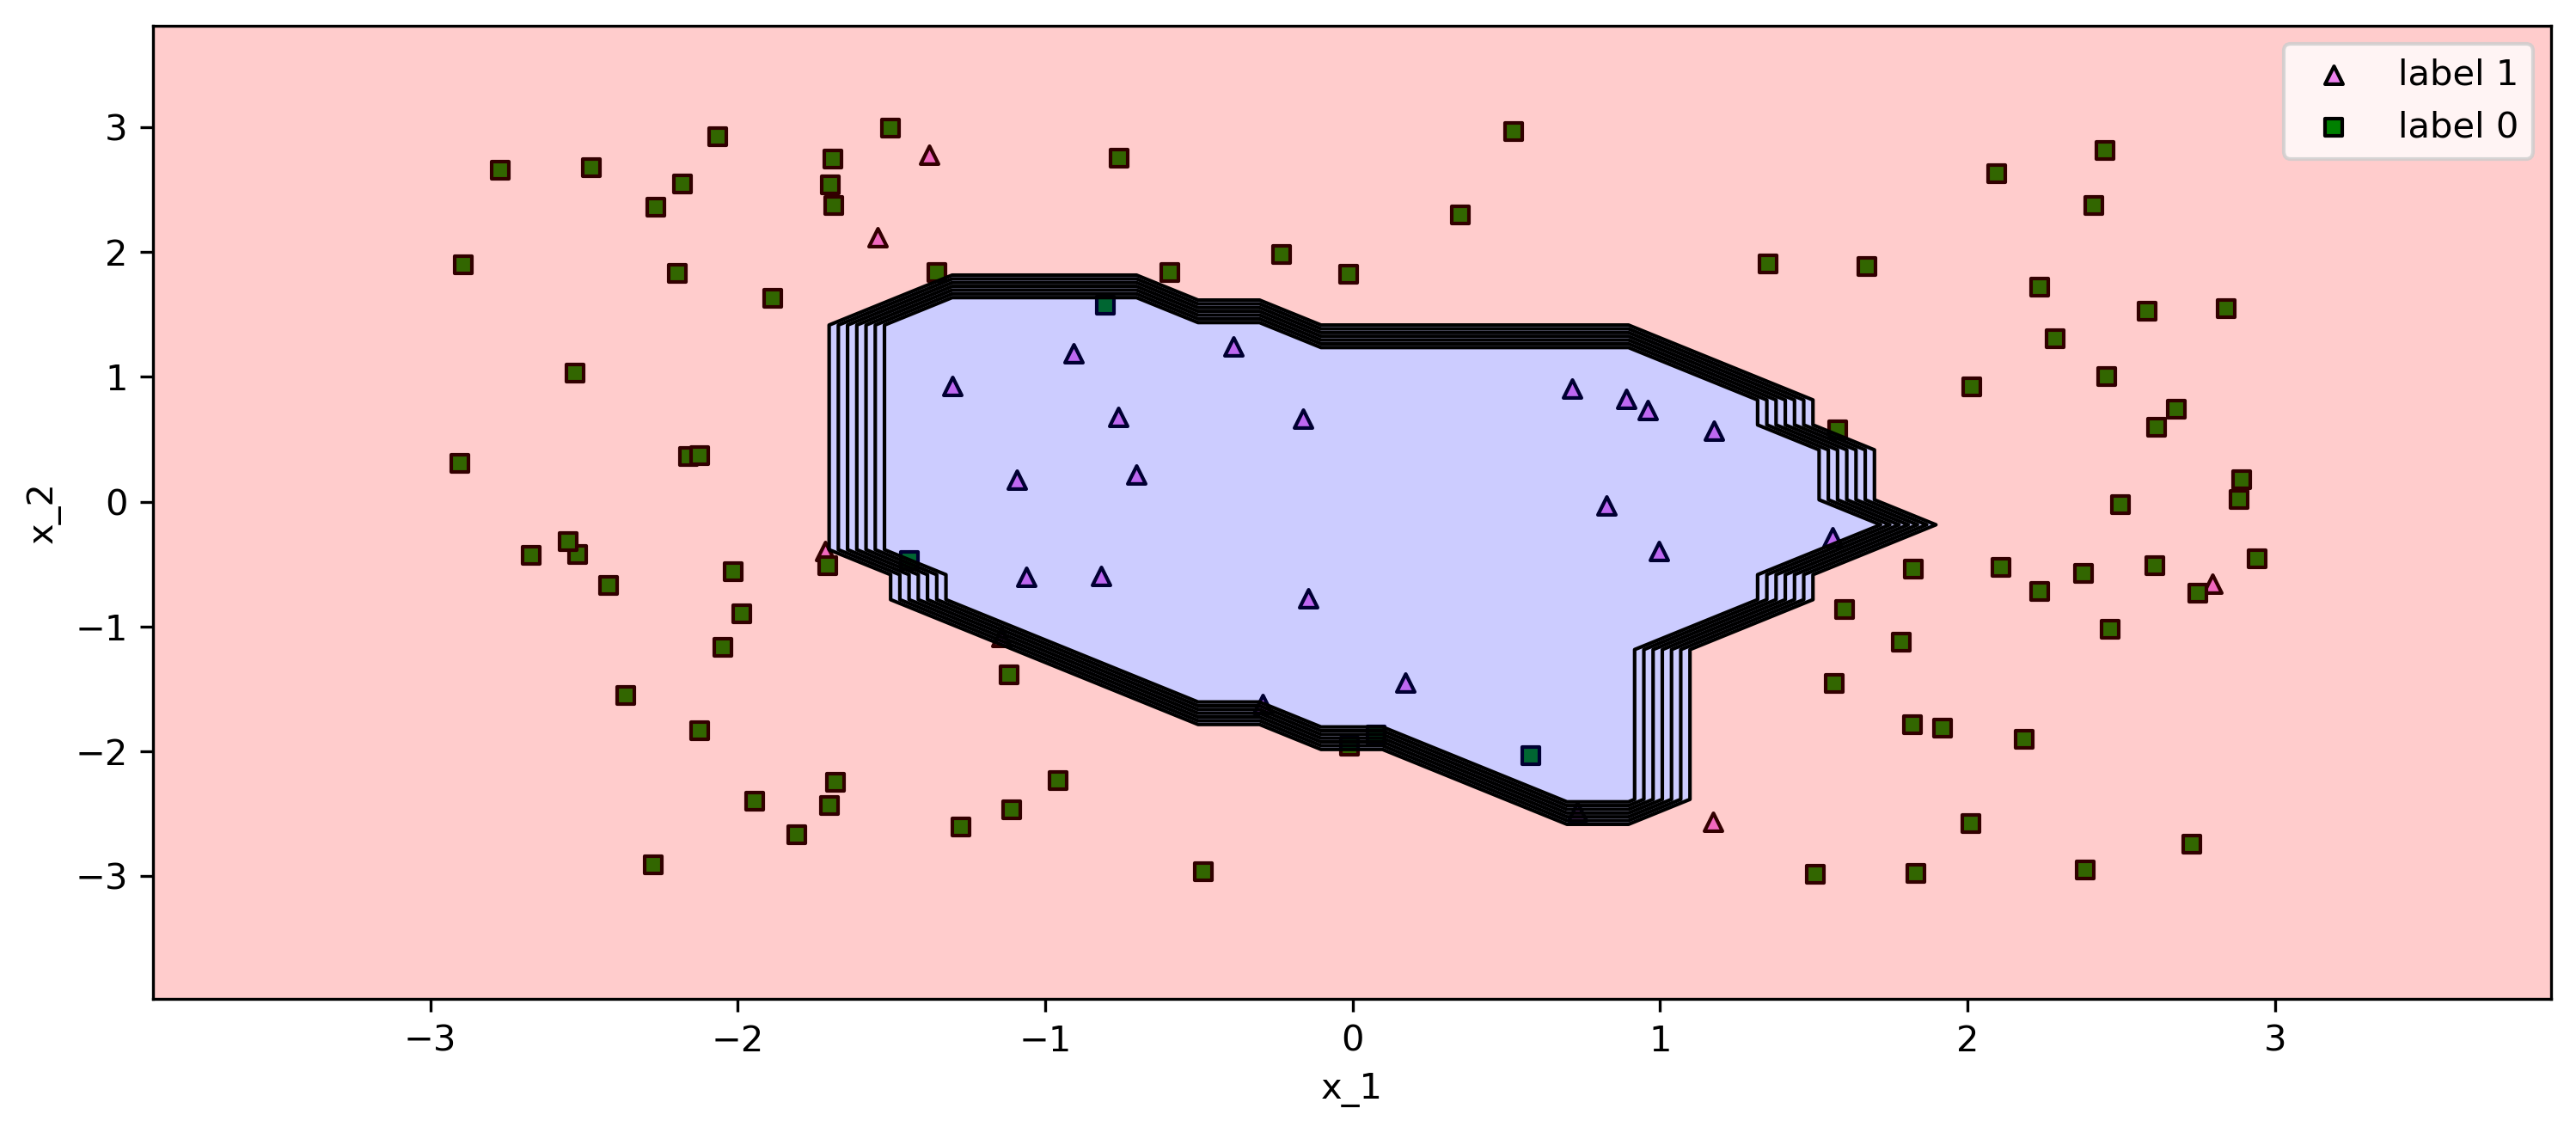

In [33]:
plot_model(x, y, model)

-----
# Image Recognition

In [34]:
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [40]:
(x_train, y_train)

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

Neural networks receive vectors as input instead of matrices, so we must turn each 28-by-28 image into a long vector of length 28^2 = 784.We use reshape to tur each block in 28 by 28

In [41]:
x_train_reshaped = x_train.reshape(-1, 28*28)
x_test_reshaped = x_test.reshape(-1,28*28)

In [42]:
# Categorizing the labels
y_train_cat = to_categorical(y_train,10)
y_test_cat = to_categorical(y_test,10)

In [56]:
# building the model
from tensorflow.keras.layers import Dense, Dropout, Activation

model = Sequential()
model.add(Dense(input_shape = (28*28,), activation = 'relu',units = 128))
model.add(Dropout(rate = 0.2))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(rate = 0.2))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dropout(rate = 0.2))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(activation = 'softmax',units = 10))

In [57]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [58]:
model.fit(x_train_reshaped, y_train_cat, epochs=10, batch_size=10)

Epoch 1/10
6000/6000 [==============================] - 16s 3ms/step - loss: 1.5091 - accuracy: 0.5696
Epoch 2/10
6000/6000 [==============================] - 15s 2ms/step - loss: 0.5228 - accuracy: 0.8620
Epoch 3/10
6000/6000 [==============================] - 16s 3ms/step - loss: 0.4133 - accuracy: 0.8988
Epoch 4/10
6000/6000 [==============================] - 17s 3ms/step - loss: 0.3722 - accuracy: 0.9106
Epoch 5/10
6000/6000 [==============================] - 15s 2ms/step - loss: 0.3531 - accuracy: 0.9175
Epoch 6/10
6000/6000 [==============================] - 16s 3ms/step - loss: 0.3354 - accuracy: 0.9225
Epoch 7/10
6000/6000 [==============================] - 16s 3ms/step - loss: 0.3302 - accuracy: 0.9239
Epoch 8/10
6000/6000 [==============================] - 15s 3ms/step - loss: 0.3295 - accuracy: 0.9263
Epoch 9/10
6000/6000 [==============================] - 16s 3ms/step - loss: 0.3153 - accuracy: 0.9278
Epoch 10/10
6000/6000 [==============================] - 16s 3ms/step - l

In [59]:
# evaluating the model
predictions_vector = model.predict(x_test_reshaped)
predictions = [np.argmax(pred) for pred in predictions_vector]

313/313 [==============================] - 1s 2ms/step


In [60]:
predictions[:10]

[7, 2, 1, 0, 4, 1, 4, 8, 6, 9]

-----
# Housing Predictions

In [67]:
housing = pd.read_csv('datasets/Hyderabad.csv')
housing

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,11000000,1460,Nacharam,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2514,26000000,1314,Manikonda,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2515,13300000,2625,Madhapur,3,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2516,10800000,2050,Hitech City,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [68]:
features = housing.drop(['Location', 'Price'], axis=1)
features

,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,1340,2,0,0,1,1,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,3498,4,0,0,1,1,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,1318,2,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1295,3,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1145,2,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,1460,2,1,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2514,1314,2,1,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2515,2625,3,1,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2516,2050,3,0,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [69]:
labels = housing['Price']
labels

0        6968000
1       29000000
2        6590000
3        5739000
4        5679000
          ...   
2513    11000000
2514    26000000
2515    13300000
2516    10800000
2517    10400000
Name: Price, Length: 2518, dtype: int64

In [70]:
model = Sequential()
model.add(Dense(units=38 , activation='relu' , input_shape = (38,)))
model.add(Dropout(rate = 0.2))
model.add(Dense(units= 128, activation='relu'))
model.add(Dropout(rate = 0.2))
model.add(Dense(units= 64, activation='relu'))
model.add(Dropout(rate = 0.2))
model.add(Dense(units=1))

In [74]:
# Compiling the model. The metrics flag is added for the model to report the root mean squared error at each epoch
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[keras.metrics.RootMeanSquaredError()])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 38)                1482      
                                                                 
 dropout_18 (Dropout)        (None, 38)                0         
                                                                 
 dense_28 (Dense)            (None, 128)               4992      
                                                                 
 dropout_19 (Dropout)        (None, 128)               0         
                                                                 
 dense_29 (Dense)            (None, 64)                8256      
                                                                 
 dropout_20 (Dropout)        (None, 64)                0         
                                                                 
 dense_30 (Dense)            (None, 1)               

In [76]:
model.fit(features, labels, epochs=10, batch_size=10)

Epoch 1/10
252/252 [==============================] - 1s 2ms/step - loss: 33094172147712.0000 - root_mean_squared_error: 5752753.5000
Epoch 2/10
252/252 [==============================] - 1s 3ms/step - loss: 32599575625728.0000 - root_mean_squared_error: 5709604.0000
Epoch 3/10
252/252 [==============================] - 1s 3ms/step - loss: 32376262492160.0000 - root_mean_squared_error: 5690014.5000
Epoch 4/10
252/252 [==============================] - 1s 3ms/step - loss: 33476046749696.0000 - root_mean_squared_error: 5785849.0000
Epoch 5/10
252/252 [==============================] - 1s 2ms/step - loss: 34712414322688.0000 - root_mean_squared_error: 5891724.0000
Epoch 6/10
252/252 [==============================] - 1s 2ms/step - loss: 30999616421888.0000 - root_mean_squared_error: 5567730.0000
Epoch 7/10
252/252 [==============================] - 1s 2ms/step - loss: 33449842835456.0000 - root_mean_squared_error: 5783584.0000
Epoch 8/10
252/252 [==============================] - 1s 2ms/s

In [73]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 38)                1482      
                                                                 
 dropout_18 (Dropout)        (None, 38)                0         
                                                                 
 dense_28 (Dense)            (None, 128)               4992      
                                                                 
 dropout_19 (Dropout)        (None, 128)               0         
                                                                 
 dense_29 (Dense)            (None, 64)                8256      
                                                                 
 dropout_20 (Dropout)        (None, 64)                0         
                                                                 
 dense_30 (Dense)            (None, 1)               

## Evaluating the model and making predictions

In [77]:
model.evaluate(features, labels)

79/79 [==============================] - 0s 2ms/step - loss: 30322769002496.0000 - root_mean_squared_error: 5506611.5000


[30322769002496.0, 5506611.5]

In [80]:
pred_val = model.predict(features)
pred_val

79/79 [==============================] - 0s 2ms/step


array([[ 8891585.],
       [23422486.],
       [ 8801344.],
       ...,
       [15954026.],
       [12051065.],
       [10395283.]], dtype=float32)

In [79]:
labels

0        6968000
1       29000000
2        6590000
3        5739000
4        5679000
          ...   
2513    11000000
2514    26000000
2515    13300000
2516    10800000
2517    10400000
Name: Price, Length: 2518, dtype: int64

In [89]:
pred_val.shape, labels.shape

((2518, 1), (2518,))

In [93]:
labels_reshaped = labels.values.reshape((2518,1))
labels_reshaped

array([[ 6968000],
       [29000000],
       [ 6590000],
       ...,
       [13300000],
       [10800000],
       [10400000]])

In [94]:
type(pred_val.shape), type(labels)

(tuple, pandas.core.series.Series)

In [96]:
difference = pred_val - labels_reshaped
difference

array([[ 1.923585e+06],
       [-5.577514e+06],
       [ 2.211344e+06],
       ...,
       [ 2.654026e+06],
       [ 1.251065e+06],
       [-4.717000e+03]])